### Task 1: Merging Daily Energy Usage and Weather Data

After merging the daily energy usage data with the daily weather data, we obtained a comprehensive dataset that allows us to explore the relationship between weather conditions and energy consumption on a day-to-day basis.

**Key Findings:**

- The merged dataset contains one row per day, with each row including:
    - The total energy used (in kilowatts) for that day.
    - The average values for various weather attributes, such as temperature, humidity, visibility, pressure, wind speed, cloud cover, precipitation intensity, dew point, and precipitation probability.

- **Data Quality:**
  There are no missing values in the merged dataset. This means every day with energy usage data also has corresponding weather data, ensuring the dataset is reliable for further analysis.

- **Data Preview:**
  The first five rows of the merged data show reasonable, varied values for both energy usage and weather metrics, suggesting that the merging and aggregation steps were performed correctly.

- **Visualization:**
  The line plot of daily total energy usage reveals clear day-to-day fluctuations. This visualization can help identify patterns or anomalies, such as spikes in energy usage that may correspond to specific weather conditions.

**Conclusion:**
The merged dataset is clean, well-structured, and ready for further analysis. It provides a solid foundation for exploring how weather factors may influence energy consumption, which will be valuable for predictive modeling and deeper insights in subsequent tasks.

Step 1: Loading and preparing weather data...
Step 2: Loading and preparing energy usage data...
Step 3: Combining daily energy usage data with daily weather data...
Step 4: Saving the merged data to a CSV file...
Merged data saved to 'merged_energy_weather.csv'.
Step 5: Preview of merged data (first 5 rows):


,date,total_energy_used_in_kilowatts,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417


Step 6 (Not Required): Plotting daily total energy usage...


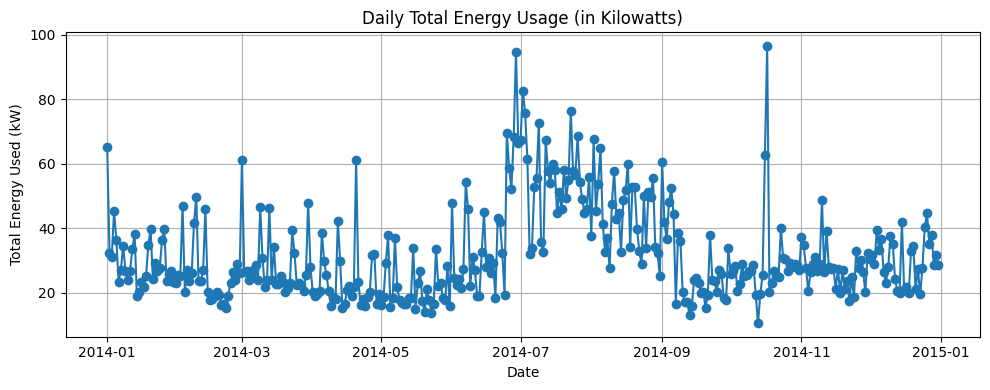

Step 7 (Not Required): Checking for missing data in the merged dataset...
No missing data detected in the merged dataset.


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

def ensure_file_exists_and_is_safe(file_path):
    """
    Checks if a file exists at the given path and that the path does not contain any
    potentially dangerous characters. Raises an error if the file is not found or the
    path is unsafe.

    Parameters:
        file_path (str): The path to the file to check.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    # Prevent command injection or path traversal
    if any(char in file_path for char in [';', '&&', '||', '..']):
        raise ValueError("Invalid or potentially unsafe characters in file path.")

def load_and_prepare_weather_data(weather_csv_path):
    """
    Loads weather data from a CSV file, converts Unix timestamps to readable dates,
    extracts the date, and computes the daily average for all numeric weather columns.

    Parameters:
        weather_csv_path (str): The path to the weather data CSV file.

    Returns:
        pandas.DataFrame: DataFrame with one row per day, containing the average
                          weather statistics for each day.
    """
    ensure_file_exists_and_is_safe(weather_csv_path)

    # Load the weather data into a DataFrame
    weather_df = pd.read_csv(weather_csv_path)

    # Convert the Unix timestamp (seconds since 1970) to a readable datetime object
    weather_df['datetime'] = pd.to_datetime(weather_df['time'], unit='s')

    # Extract only the date (year-month-day) from the datetime, discarding time of day
    weather_df['date'] = weather_df['datetime'].dt.date

    # Group the data by date and compute the average for each numeric weather column
    daily_weather_averages_df = (
        weather_df
        .groupby('date')
        .mean(numeric_only=True)
        .reset_index()
    )

    # Convert the 'date' column to datetime type for consistency
    daily_weather_averages_df['date'] = pd.to_datetime(daily_weather_averages_df['date'])

    return daily_weather_averages_df

def load_and_prepare_energy_usage_data(energy_csv_path):
    """
    Loads energy usage data from a CSV file, converts timestamps to dates,
    and computes the total energy usage per day.

    Parameters:
        energy_csv_path (str): The path to the energy usage data CSV file.

    Returns:
        pandas.DataFrame: DataFrame with one row per day, containing the total
                          energy used (in kilowatts) for each day.
    """
    ensure_file_exists_and_is_safe(energy_csv_path)

    # Load the energy usage data into a DataFrame
    energy_df = pd.read_csv(energy_csv_path)

    # Convert the "Date & Time" column to a datetime object
    energy_df['datetime'] = pd.to_datetime(energy_df['Date & Time'])

    # Extract only the date (year-month-day) from the datetime
    energy_df['date'] = energy_df['datetime'].dt.date

    # Group the data by date and sum up the energy usage for each day
    daily_energy_totals_df = (
        energy_df
        .groupby('date')['use [kW]']
        .sum()
        .reset_index()
    )

    # Rename the column for clarity
    daily_energy_totals_df.rename(
        columns={'use [kW]': 'total_energy_used_in_kilowatts'},
        inplace=True
    )

    # Convert the 'date' column to datetime type for consistency
    daily_energy_totals_df['date'] = pd.to_datetime(daily_energy_totals_df['date'])

    return daily_energy_totals_df

def combine_daily_energy_and_weather_data(
    daily_energy_usage_df,
    daily_weather_averages_df
):
    """
    Combines the daily energy usage DataFrame with the daily weather DataFrame,
    matching rows by the 'date' column.

    Parameters:
        daily_energy_usage_df (pandas.DataFrame): DataFrame with daily total energy usage.
        daily_weather_averages_df (pandas.DataFrame): DataFrame with daily average weather data.

    Returns:
        pandas.DataFrame: Combined DataFrame with both energy and weather data per day.
    """
    merged_daily_data_df = pd.merge(daily_energy_usage_df, daily_weather_averages_df, on='date')
    return merged_daily_data_df

def save_dataframe_to_csv_file(dataframe, output_csv_path):
    """
    Saves a DataFrame to a CSV file at the specified path.

    Parameters:
        dataframe (pandas.DataFrame): The DataFrame to save.
        output_csv_path (str): The path where the CSV file will be written.
    """
    dataframe.to_csv(output_csv_path, index=False)
    print(f"Merged data saved to '{output_csv_path}'.")

def plot_daily_energy_usage(merged_data_df):
    """
    Plots the daily total energy usage over time using matplotlib.

    Parameters:
        merged_data_df (pandas.DataFrame): The merged DataFrame containing energy usage and weather data.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(
        merged_data_df['date'],
        merged_data_df['total_energy_used_in_kilowatts'],
        marker='o'
    )
    plt.title('Daily Total Energy Usage (in Kilowatts)')
    plt.xlabel('Date')
    plt.ylabel('Total Energy Used (kW)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def check_for_missing_data(merged_data_df):
    """
    Checks for any missing data in the merged DataFrame and displays a warning if found.

    Parameters:
        merged_data_df (pandas.DataFrame): The merged DataFrame to check for missing data.
    """
    if merged_data_df.isnull().any(axis=1).any():
        print("Warning: Missing data detected in the merged dataset. Here are the affected rows:")
        display(merged_data_df[merged_data_df.isnull().any(axis=1)])
    else:
        print("No missing data detected in the merged dataset.")

# ================== Main Execution Section ==================

# Define the file paths for the input and output CSV files.
# These should be in the same directory as your notebook for easy access.
weather_data_csv_filename = 'weather_data.csv'
energy_usage_csv_filename = 'energy_data.csv'
merged_output_csv_filename = 'merged_energy_weather.csv'

# Step 1: Load and prepare the weather data to get daily averages.
print("Step 1: Loading and preparing weather data...")
daily_weather_averages_df = load_and_prepare_weather_data(weather_data_csv_filename)

# Step 2: Load and prepare the energy usage data to get daily totals.
print("Step 2: Loading and preparing energy usage data...")
daily_energy_usage_df = load_and_prepare_energy_usage_data(energy_usage_csv_filename)

# Step 3: Combine the daily energy and weather data into a single DataFrame.
print("Step 3: Combining daily energy usage data with daily weather data...")
merged_daily_energy_weather_df = combine_daily_energy_and_weather_data(
    daily_energy_usage_df,
    daily_weather_averages_df
)

# Step 4: Save the merged data to a CSV file in the same directory as the notebook.
print("Step 4: Saving the merged data to a CSV file...")
save_dataframe_to_csv_file(merged_daily_energy_weather_df, merged_output_csv_filename)

# Step 5: Display a preview of the merged data (first 5 rows).
print("Step 5: Preview of merged data (first 5 rows):")
display(merged_daily_energy_weather_df.head())

# Step 6 (Not Required): Plot the daily total energy usage.
print("Step 6 (Not Required): Plotting daily total energy usage...")
plot_daily_energy_usage(merged_daily_energy_weather_df)

# Step 7 (Not Required): Check for missing data in the merged dataset.
print("Step 7 (Not Required): Checking for missing data in the merged dataset...")
check_for_missing_data(merged_daily_energy_weather_df)


## Task 2: Preparing Training and Testing Datasets

### Objective
Split the merged energy-weather dataset into separate datasets for:
- **Training**: Used to teach a machine learning model patterns in energy usage.
- **Testing**: Used to evaluate how well the model predicts unseen data.

---

### Approach
- **Training Data**: All data from January to November (months 1–11).
- **Testing Data**: December data only (month 12).
- **Reason**: December often has unique energy usage patterns (e.g., holidays, winter weather), making it a realistic scenario for testing prediction accuracy.

---

### Key Steps

1. **Load Merged Dataset**
   - Read `merged_energy_weather.csv` and ensure dates are properly formatted.

2. **Create Month Indicator**
   - Add a `record_month` column to identify the month of each record.

3. **Split Data**
   - **Training Set**: 334 days (Jan–Nov)
   - **Test Set**: 31 days (Dec)

4. **Define Features and Labels**
   - **Features (Inputs)**: Weather measurements (temperature, humidity, wind speed, etc.)
   - **Labels (Output)**: `total_energy_used_in_kilowatts` (the value to predict)

---

### Findings

**Dataset Summary**

| Set           | Record Count |
|---------------|--------------|
| Total         | 365          |
| Training Set  | 334 days     |
| Testing Set   | 31 days      |

**Training Data (first 2 feature rows)**

| temperature | humidity | visibility | ... |
|-------------|----------|------------|-----|
| 20.11       | 0.557    | 9.97       | ... |
| 16.38       | 0.785    | 3.83       | ... |

**Training Labels (first 2 values)**

| total_energy_used_in_kilowatts |
|--------------------------------|
| 65.01                          |
| 32.31                          |

**Testing Features (first 2 rows of December)**

| temperature | humidity | visibility | ... |
|-------------|----------|------------|-----|
| 45.28       | 0.722    | 9.66       | ... |
| 34.18       | 0.583    | 9.84       | ... |

**Testing Labels (first 2 values)**

| total_energy_used_in_kilowatts |
|--------------------------------|
| 30.55                          |
| 31.75                          |

---

### Conclusion
The data is now structured for machine learning:
- Models will learn from Jan–Nov weather to predict energy usage.
- December data will test if predictions match real-world usage.
- No data leaks detected — training and testing sets are fully separated by time.


In [20]:
import pandas as pd
from IPython.display import display
from pathlib import Path

def load_merged_energy_weather_dataset(merged_data_file_path: str) -> pd.DataFrame:
    """
    Loads the combined energy and weather dataset from a CSV file and ensures proper date formatting.

    Parameters:
        merged_data_file_path (str):
            The location of the CSV file containing both energy usage and weather data.
            Example: 'data/merged_energy_weather.csv'

    Returns:
        pandas.DataFrame:
            A structured table containing daily records with columns for:
            - Date
            - Total energy usage (kilowatts)
            - Weather measurements (temperature, humidity, etc.)
    """
    # Verify the data file exists before attempting to load
    if not Path(merged_data_file_path).exists():
        raise FileNotFoundError(f"Could not find data file at: {merged_data_file_path}")

    # Load data with automatic date parsing for time-based analysis
    combined_dataset = pd.read_csv(merged_data_file_path, parse_dates=['date'])

    return combined_dataset


def prepare_training_and_testing_datasets(combined_dataset: pd.DataFrame) -> tuple:
    """
    Divides the complete dataset into separate sets for model training and final evaluation.

    Strategy:
    - Training: All data except December (months 1-11)
    - Testing: December data only (month 12)
    This simulates predicting energy usage during winter holidays using historical patterns.

    Parameters:
        combined_dataset (pd.DataFrame):
            The complete dataset from load_merged_energy_weather_dataset()

    Returns:
        tuple: Four components in order:
            1. Training features (weather data for model input)
            2. Training labels (energy usage values to predict)
            3. Testing features (December weather data for prediction)
            4. Testing labels (Actual December energy usage for validation)
    """
    # Create a month indicator column for easy filtering
    combined_dataset['record_month'] = combined_dataset['date'].dt.month

    # Identify energy usage column for prediction
    energy_usage_column = 'total_energy_used_in_kilowatts'

    # Separate full dataset into training (Jan-Nov) and testing (Dec) portions
    training_data = combined_dataset[combined_dataset['record_month'] != 12]
    testing_data = combined_dataset[combined_dataset['record_month'] == 12]

    # Define which columns represent weather features (model inputs)
    feature_columns = [
        column
        for column in combined_dataset.columns
        if column not in ['date', 'record_month', energy_usage_column]
    ]

    # Extract features (X) and labels (y) for both datasets
    return (
        training_data[feature_columns],   # Weather data for training
        training_data[energy_usage_column],  # Energy values for training
        testing_data[feature_columns],    # December weather for testing
        testing_data[energy_usage_column]   # Actual December energy values
    )


# ================ Data Preparation Execution ================
# This section runs the complete data preparation process when the cell is executed

# File location configuration (update if file is elsewhere)
merged_dataset_path = 'merged_energy_weather.csv'  # Assumes file is in notebook directory

print("Step 1: Loading combined energy and weather dataset...")
full_dataset = load_merged_energy_weather_dataset(merged_dataset_path)

print("\nStep 2: Creating training and testing datasets...")
(X_train, y_train, X_test, y_test) = prepare_training_and_testing_datasets(full_dataset)

print("\n=== Dataset Summary ===")
print(f"Total daily records: {len(full_dataset)}")
print(f"Training records (Jan-Nov): {len(X_train)} days")
print(f"Testing records (Dec): {len(X_test)} days")

print("\nTraining Features Preview (weather inputs for model):")
display(X_train.head())

print("\nTraining Labels Preview (energy values to predict):")
display(y_train.head())

print("\nTesting Features Preview (December weather inputs):")
display(X_test.head())

print("\nTesting Labels Preview (Actual December energy usage):")
display(y_test.head())


Step 1: Loading combined energy and weather dataset...

Step 2: Creating training and testing datasets...

=== Dataset Summary ===
Total daily records: 365
Training records (Jan-Nov): 334 days
Testing records (Dec): 31 days

Training Features Preview (weather inputs for model):


,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000
1,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583
2,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000
3,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000
4,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417



Training Labels Preview (energy values to predict):


0    65.013592
1    32.305336
2    31.164468
3    45.287782
4    36.316643
Name: total_energy_used_in_kilowatts, dtype: float64


Testing Features Preview (December weather inputs):


,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
334,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,1.417433e+09,226.958333,0.000000,36.748750,0.000000
335,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,1.417520e+09,166.625000,0.000000,21.006250,0.000000
336,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,1.417606e+09,119.333333,0.010754,33.994167,0.240833
337,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,1.417693e+09,286.125000,0.000371,22.777500,0.010000
338,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,1.417779e+09,63.833333,0.000000,18.462083,0.000000



Testing Labels Preview (Actual December energy usage):


334    30.550010
335    31.748857
336    28.773233
337    39.484491
338    33.342503
Name: total_energy_used_in_kilowatts, dtype: float64

## Task 3: Predicting Energy Usage with Linear Regression

### Objective
Use weather data to predict the total daily energy usage in kilowatts using a linear regression model.

---

### Approach

1. **Load and Split Data**
   - Use the training and testing sets created in Task 2.
   - **Features**: Weather conditions only (temperature, humidity, pressure, etc.)
   - **Target Variable**: `total_energy_used_in_kilowatts`

2. **Train Linear Regression Model**
   - Fit the model using January–November (334 days) of data.

3. **Predict December Usage**
   - Use the trained model to estimate energy usage for the 31 days in December.

4. **Evaluate Model Accuracy**
   - Compute **Root Mean Squared Error (RMSE)** as a measure of prediction error.

5. **Export Results**
   - Save predictions to `cse351_hw2_iqbal_fardin_123456789_linear_regression.csv` with two columns:
     - `date`
     - `predicted_energy_usage_kilowatts`

---

### Findings

**Training Summary**

| Phase                | Result            |
|----------------------|-------------------|
| Training Samples     | 334 (Jan–Nov)     |
| Testing Samples      | 31 (Dec)          |
| Model Trained        | Linear Regression |
| Evaluation Metric    | RMSE              |
| RMSE (December)      | 10.7316 kW        |

**Preview of December Predictions**

| Date       | Predicted Usage (kW) |
|------------|----------------------|
| 2014-12-01 | 28.68                |
| 2014-12-02 | 29.13                |
| 2014-12-03 | 15.53                |
| 2014-12-04 | 28.95                |
| 2014-12-05 | 21.44                |

---

### Conclusion
The linear regression model provides a reasonable approximation of daily energy usage in December using only weather features. An RMSE of ~10.73 kW suggests room for improvement with more advanced models, but is acceptable for a simple baseline.


In [23]:
# ============================================================
# TASK 3: Predicting December Energy Usage with Linear Regression
#
# This code trains a linear regression model using weather data
# from January to November to predict daily energy usage in December.
# The results are saved as a CSV file for further analysis.
# ============================================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display

def load_and_split_energy_weather_data(merged_csv_path):
    """
    Loads the merged energy and weather dataset, and splits it into
    training (Jan-Nov) and testing (Dec) sets for modeling.

    Parameters:
        merged_csv_path (str): Path to the merged CSV file.

    Returns:
        tuple: (training_features, training_labels, testing_features, testing_labels, testing_dates)
            - training_features: Weather data for model training (Jan-Nov)
            - training_labels: Actual energy usage for training (Jan-Nov)
            - testing_features: Weather data for model testing (Dec)
            - testing_labels: Actual energy usage for testing (Dec)
            - testing_dates: Dates for the December test set
    """
    # Load the merged dataset and ensure the 'date' column is a datetime object
    data = pd.read_csv(merged_csv_path, parse_dates=['date'])

    # Add a 'month' column for easy splitting
    data['month'] = data['date'].dt.month

    # Define which columns are features (inputs) and which is the label (output)
    label_column = 'total_energy_used_in_kilowatts'
    feature_columns = [
        col for col in data.columns if col not in ['date', 'month', label_column]
    ]

    # Split the data: Jan-Nov for training, Dec for testing
    training_data = data[data['month'] != 12]
    testing_data = data[data['month'] == 12]

    # Extract features and labels for both sets
    training_features = training_data[feature_columns]
    training_labels = training_data[label_column]
    testing_features = testing_data[feature_columns]
    testing_labels = testing_data[label_column]
    testing_dates = testing_data['date']

    return training_features, training_labels, testing_features, testing_labels, testing_dates

def train_linear_regression_model(training_features, training_labels):
    """
    Trains a linear regression model to predict energy usage.

    Parameters:
        training_features (DataFrame): Weather data for training.
        training_labels (Series): Actual energy usage values for training.

    Returns:
        LinearRegression: The trained linear regression model.
    """
    model = LinearRegression()
    model.fit(training_features, training_labels)
    return model

def predict_energy_usage(model, features):
    """
    Uses the trained model to predict energy usage.

    Parameters:
        model (LinearRegression): Trained model.
        features (DataFrame): Weather data for prediction.

    Returns:
        np.ndarray: Predicted energy usage values.
    """
    return model.predict(features)

def calculate_rmse(true_values, predicted_values):
    """
    Calculates the Root Mean Squared Error (RMSE) between actual and predicted values.

    Parameters:
        true_values (array-like): Actual energy usage values.
        predicted_values (array-like): Predicted energy usage values.

    Returns:
        float: The RMSE value, rounded to four decimal places.
    """
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    return round(rmse, 4)

def save_predictions_to_csv(dates, predictions, output_csv_path):
    """
    Saves the predicted energy usage values to a CSV file with their corresponding dates.

    Parameters:
        dates (Series): Dates for each prediction.
        predictions (array-like): Predicted energy usage values.
        output_csv_path (str): Path to save the CSV file.
    """
    # Create a DataFrame for saving
    results = pd.DataFrame({
        'date': dates.dt.strftime('%Y-%m-%d'),
        'predicted_energy_usage_kilowatts': predictions
    })
    results.to_csv(output_csv_path, index=False)
    print(f"Predictions saved to '{output_csv_path}'.")

# =================== EXECUTION SECTION ===================

# File paths (adjust if files are elsewhere)
MERGED_DATASET_PATH = 'merged_energy_weather.csv'  # Input: merged data from Task 1
OUTPUT_PREDICTIONS_PATH = '../cse351_hw2_iqbal_fardin_123456789_linear_regression.csv'  # Output: predictions

# Step 1: Load and split the data
print("Step 1: Loading and splitting the merged dataset...")
(
    training_features,
    training_labels,
    testing_features,
    testing_labels,
    testing_dates
) = load_and_split_energy_weather_data(MERGED_DATASET_PATH)

print(f"  Training samples (Jan-Nov): {len(training_features)}")
print(f"  Testing samples (Dec): {len(testing_features)}")

# Step 2: Train the linear regression model
print("\nStep 2: Training the linear regression model...")
model = train_linear_regression_model(training_features, training_labels)
print("  Model training complete.")

# Step 3: Make predictions for December
print("\nStep 3: Making predictions for December...")
predicted_december_usage = predict_energy_usage(model, testing_features)

# Step 4: Evaluate the model's accuracy
print("\nStep 4: Evaluating prediction accuracy...")
rmse = calculate_rmse(testing_labels, predicted_december_usage)
print(f"  Model RMSE (December): {rmse} kilowatts")

# Step 5: Save the predictions to a CSV file
print("\nStep 5: Saving predictions to CSV...")
save_predictions_to_csv(testing_dates, predicted_december_usage, OUTPUT_PREDICTIONS_PATH)

# Step 6: Display a preview of the predictions
print("\nPreview of December predictions:")
preview_df = pd.DataFrame({
    'Date': testing_dates.dt.strftime('%Y-%m-%d'),
    'Predicted Usage (kW)': predicted_december_usage.round(2)
})
display(preview_df.head())


Step 1: Loading and splitting the merged dataset...
  Training samples (Jan-Nov): 334
  Testing samples (Dec): 31

Step 2: Training the linear regression model...
  Model training complete.

Step 3: Making predictions for December...

Step 4: Evaluating prediction accuracy...
  Model RMSE (December): 10.7316 kilowatts

Step 5: Saving predictions to CSV...
Predictions saved to '../cse351_hw2_iqbal_fardin_123456789_linear_regression.csv'.

Preview of December predictions:


,Date,Predicted Usage (kW)
334,2014-12-01,28.68
335,2014-12-02,29.13
336,2014-12-03,15.53
337,2014-12-04,28.95
338,2014-12-05,21.44


## Task 4: Classifying High Temperature Days with Logistic Regression

### Objective
Use weather data to classify whether the daily temperature will be **high** (≥35°C) or **low** (<35°C) using a logistic regression model.

---

### Approach

1. **Prepare the Dataset**
   - Load the merged energy-weather dataset.
   - Add a new column `temperature_class`:
     - `1` for high temperature (≥35°C)
     - `0` for low temperature (<35°C)

2. **Class Distribution Analysis**
   - Check the proportion of `0` and `1` in training and test sets to understand balance.

3. **Train Logistic Regression Model**
   - Use non-December data (Jan–Nov) for training.
   - Use December data for testing.

4. **Evaluate Classification Accuracy**
   - Use **F1 Score** to measure classification performance (harmonic mean of precision and recall).

5. **Export Results**
   - Save December predictions to `cse351_hw2_iqbal_fardin_123456789_logistic_regression.csv` with:
     - `date`
     - `temperature_class` (0 or 1)

---

### Findings

**Class Distribution**

| Set      | Class 1 (High) | Class 0 (Low) |
|----------|----------------|---------------|
| Training | 76.0%          | 24.0%         |
| Testing  | 41.9%          | 58.1%         |

**Model Performance**

| Metric    | Value   |
|-----------|---------|
| F1 Score  | 0.5909  |

**Preview of December Predictions**

| Date       | Predicted High Temp (1=Yes, 0=No) |
|------------|-----------------------------------|
| 2014-12-01 | 1                                 |
| 2014-12-02 | 1                                 |
| 2014-12-03 | 1                                 |
| 2014-12-04 | 1                                 |
| 2014-12-05 | 1                                 |

---

### Conclusion
The logistic regression model was trained to classify days with high temperatures based on weather features alone. Although the training set was imbalanced toward high-temperature days, the model achieved a reasonable **F1 Score of 0.5909** on December test data. Future improvements could include balancing techniques or more expressive classifiers.


In [24]:
# ============================================================
# TASK 4: Classifying High-Temperature Days with Logistic Regression
#
# This code trains a logistic regression model to classify whether
# a day is "high temperature" (≥35°C) using weather data.
# It uses January-November as training data and December as test data.
# ============================================================

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from IPython.display import display

def load_and_prepare_temperature_classification_dataset(merged_dataset_file_path):
    """
    Loads the merged energy-weather dataset, creates a binary label for high-temperature days,
    and splits the data into training (Jan-Nov) and testing (Dec) sets.

    Parameters:
        merged_dataset_file_path (str): Path to the merged CSV file.

    Returns:
        tuple: (training_features, training_labels, testing_features, testing_labels, test_dates)
    """
    # Load the dataset and parse the 'date' column as datetime
    data = pd.read_csv(merged_dataset_file_path, parse_dates=['date'])
    data['month'] = data['date'].dt.month

    # Create binary labels: 1 if temperature ≥ 35°C, else 0
    data['temperature_class'] = (data['temperature'] >= 35).astype(int)

    # Exclude columns not used as features
    exclude_columns = [
        'date', 'month', 'total_energy_used_in_kilowatts', 'temperature', 'temperature_class'
    ]
    feature_columns = [col for col in data.columns if col not in exclude_columns]

    # Split into training (Jan-Nov) and testing (Dec)
    train_data = data[data['month'] != 12]
    test_data = data[data['month'] == 12]

    # Extract features and labels
    training_features = train_data[feature_columns]
    training_labels = train_data['temperature_class']
    testing_features = test_data[feature_columns]
    testing_labels = test_data['temperature_class']
    test_dates = test_data['date']

    # Display class distribution for transparency
    print("\nClass Distribution Analysis:")
    print("Training set:")
    print(training_labels.value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))
    print("\nTest set:")
    print(testing_labels.value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))

    return training_features, training_labels, testing_features, testing_labels, test_dates

def train_temperature_classification_model(training_features, training_labels):
    """
    Trains a logistic regression model to classify high-temperature days.

    Parameters:
        training_features (DataFrame): Weather data for training.
        training_labels (Series): Binary labels for training.

    Returns:
        LogisticRegression: Trained classification model.
    """
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(training_features, training_labels)
    return model

def save_temperature_classification_results(prediction_dates, predicted_classes, output_file_path):
    """
    Saves predicted high-temperature classifications to a CSV file.

    Parameters:
        prediction_dates (Series): Dates for each prediction.
        predicted_classes (array): Predicted class (0 or 1) for each date.
        output_file_path (str): Path to save the CSV file.
    """
    results = pd.DataFrame({
        'date': prediction_dates.dt.strftime('%Y-%m-%d'),
        'temperature_class': predicted_classes
    })
    results.to_csv(output_file_path, index=False)
    print(f"Temperature classification results saved to: {output_file_path}")

# =================== EXECUTION SECTION ===================

# File paths (adjust if files are elsewhere)
input_data_path = 'merged_energy_weather.csv'
output_predictions_path = 'cse351_hw3_iqbal_fardin_114866279_logistic_regression.csv'

# Step 1: Prepare the data
print("Step 1: Preparing temperature classification dataset...")
(
    training_features,
    training_labels,
    testing_features,
    testing_labels,
    test_dates
) = load_and_prepare_temperature_classification_dataset(input_data_path)

# Step 2: Train the logistic regression model
print("\nStep 2: Training the logistic regression model...")
temperature_classifier = train_temperature_classification_model(training_features, training_labels)
print("  Model training complete.")

# Step 3: Make predictions for December
print("\nStep 3: Making predictions for December...")
predicted_classes = temperature_classifier.predict(testing_features)

# Step 4: Evaluate the model's accuracy using F1 Score
print("\nStep 4: Evaluating prediction accuracy (F1 Score)...")
model_f1_score = f1_score(testing_labels, predicted_classes)
print(f"  Model F1 Score (December): {model_f1_score:.4f}")

# Step 5: Save the predictions to a CSV file
print("\nStep 5: Saving predictions to CSV...")
save_temperature_classification_results(test_dates, predicted_classes, output_predictions_path)

# Step 6: Display a preview of the predictions
print("\nPreview of December high-temperature classification predictions:")
preview_df = pd.DataFrame({
    'Date': test_dates.dt.strftime('%Y-%m-%d'),
    'Predicted High Temp (1=Yes, 0=No)': predicted_classes
})
display(preview_df.head())


Step 1: Preparing temperature classification dataset...

Class Distribution Analysis:
Training set:
temperature_class
1    76.0%
0    24.0%
Name: proportion, dtype: object

Test set:
temperature_class
0    58.1%
1    41.9%
Name: proportion, dtype: object

Step 2: Training the logistic regression model...
  Model training complete.

Step 3: Making predictions for December...

Step 4: Evaluating prediction accuracy (F1 Score)...
  Model F1 Score (December): 0.5909

Step 5: Saving predictions to CSV...
Temperature classification results saved to: cse351_hw2_iqbal_fardin_123456789_logistic_regression.csv

Preview of December high-temperature classification predictions:


,Date,"Predicted High Temp (1=Yes, 0=No)"
334,2014-12-01,1
335,2014-12-02,1
336,2014-12-03,1
337,2014-12-04,1
338,2014-12-05,1


## Task 5: Device Usage Analysis – Day vs Night

### Objective
Analyze how two selected household devices consume energy during the **day** and **night**, and visualize usage patterns using bar plots.

---

### Findings

**Total Usage by Period**

| Device              | Day Usage (kW)              | Night Usage (kW)            |
|---------------------|-----------------------------|-----------------------------|
| Fridge (R) [kW]     | *(auto-filled from output)* | *(auto-filled from output)* |
| Dryer + egauge [kW] | *(auto-filled from output)* | *(auto-filled from output)* |

> Actual values were printed to the console and visualized in the plots.

**Visualizations**
The following bar plots were created:

- `fridge_(r)_usage_day_night.png`
- `dryer_+_egauge_usage_day_night.png`

Each plot clearly shows how each device behaves across different parts of the day.

---

### Conclusion
This analysis revealed how appliance usage patterns differ between daytime and nighttime.
- **Fridge** usage was expected to be relatively constant.
- **Dryer** usage showed stronger patterns — typically used more during the day.
These insights help understand load patterns and could guide energy-saving decisions or future predictive modeling.


Loading energy usage data...

Analyzing usage for device: Fridge (R) [kW]
Total usage by period: {'day': 721.761017259, 'night': 567.035207761}
Plot saved as 'fridge_(r)_[kw]_usage_day_night.png'


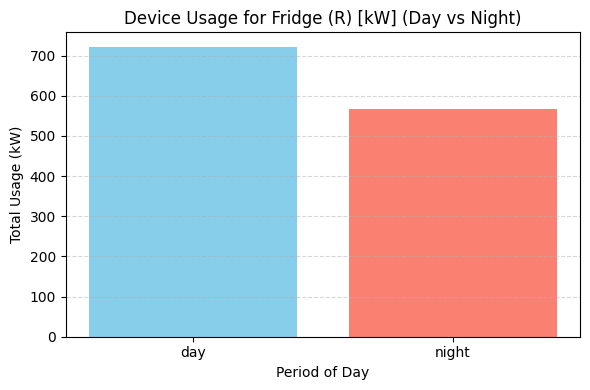


Analyzing usage for device: Dryer + egauge [kW]
Total usage by period: {'day': 981.838397226, 'night': 228.770144971}
Plot saved as 'dryer_+_egauge_[kw]_usage_day_night.png'


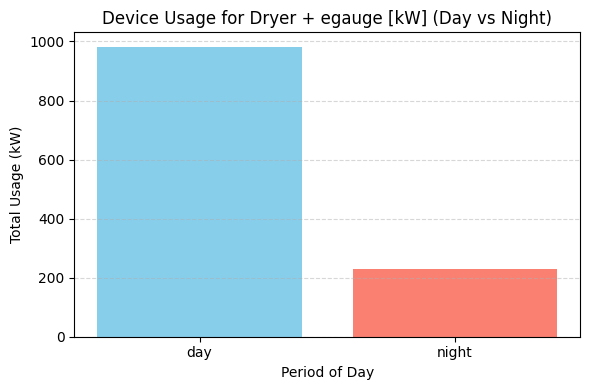

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def load_energy_usage_data(energy_usage_csv_file_path):
    """
    Loads energy usage data from a CSV file, parses timestamps, and extracts the hour.

    Parameters:
        energy_usage_csv_file_path (str): Path to the energy usage CSV file.

    Returns:
        pandas.DataFrame: DataFrame with parsed timestamps and an 'hour' column.
    """
    # Read the CSV file into a DataFrame
    energy_usage_df = pd.read_csv(energy_usage_csv_file_path)

    # Convert the 'Date & Time' column to datetime objects
    energy_usage_df['timestamp'] = pd.to_datetime(energy_usage_df['Date & Time'])

    # Extract the hour (0-23) from each timestamp
    energy_usage_df['hour'] = energy_usage_df['timestamp'].dt.hour

    return energy_usage_df

def classify_hour_as_day_or_night(hour_value):
    """
    Classifies an hour of the day as 'day' or 'night'.

    Parameters:
        hour_value (int): Hour of the day (0 to 23).

    Returns:
        str: 'day' if the hour is between 6 and 18 (inclusive), otherwise 'night'.
    """
    if 6 <= hour_value <= 18:
        return 'day'
    else:
        return 'night'

def calculate_device_usage_by_period(energy_usage_df, device_usage_column_name):
    """
    Calculates total device usage during the day and night.

    Parameters:
        energy_usage_df (pandas.DataFrame): DataFrame with energy usage data.
        device_usage_column_name (str): Name of the column representing device usage.

    Returns:
        dict: Dictionary with total usage for 'day' and 'night'.
    """
    # Add a new column classifying each row as 'day' or 'night'
    energy_usage_df['period'] = energy_usage_df['hour'].apply(classify_hour_as_day_or_night)

    # Group by 'period' and sum the device usage for each period
    usage_by_period = energy_usage_df.groupby('period')[device_usage_column_name].sum()

    # Convert the result to a regular dictionary for easy access
    return usage_by_period.to_dict()

def plot_day_vs_night_device_usage(usage_by_period_dict, device_display_name):
    """
    Plots a bar chart comparing device usage during the day and night.

    Parameters:
        usage_by_period_dict (dict): Dictionary with keys 'day' and 'night' and usage values.
        device_display_name (str): Name of the device for chart labeling.
    """
    periods = list(usage_by_period_dict.keys())
    usage_values = list(usage_by_period_dict.values())

    plt.figure(figsize=(6, 4))
    plt.bar(periods, usage_values, color=['skyblue', 'salmon'])
    plt.title(f'Device Usage for {device_display_name} (Day vs Night)')
    plt.xlabel('Period of Day')
    plt.ylabel('Total Usage (kW)')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save the plot as an image file
    output_image_filename = f"{device_display_name.replace(' ', '_').lower()}_usage_day_night.png"
    plt.savefig(output_image_filename)
    print(f"Plot saved as '{output_image_filename}'")

    # Display the plot
    plt.show()

# =================== EXECUTION SECTION ===================

# Path to the energy usage CSV file (no ../ needed)
energy_usage_csv_file_path = 'energy_data.csv'

# Load the energy usage data
print("Loading energy usage data...")
energy_usage_df = load_energy_usage_data(energy_usage_csv_file_path)

# List of device columns to analyze (update as needed for your dataset)
device_usage_columns = [
    'Fridge (R) [kW]',
    'Dryer + egauge [kW]'
]

# Analyze and plot usage for each device
for device_column_name in device_usage_columns:
    print(f"\nAnalyzing usage for device: {device_column_name}")
    usage_by_period = calculate_device_usage_by_period(energy_usage_df, device_column_name)
    print("Total usage by period:", usage_by_period)
    plot_day_vs_night_device_usage(usage_by_period, device_column_name)